In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
tweets = pd.read_csv("small_business_tweets.csv")
tweets = tweets[["date","id","text","year"]]
tweets.year = tweets.year.apply(lambda x: int(x))
tweets["sentiment_score"] = np.nan
tweets = tweets[tweets.year > 2006].reset_index(drop=True)

In [12]:
sentiment_proportion = pd.DataFrame()
for year in tweets.year.unique():
    temp_df = tweets[tweets.year == year].reset_index(drop=True)
    year_text = ""
    for idx in range(temp_df.shape[0]):
        temp_text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", temp_df.loc[idx, "text"]).split())
        year_text += (" " + temp_text)
    year_word_list = year_text.split()
    total_num = len(year_word_list)
    pos_num = 0
    nue_num = 0
    neg_num = 0
    for word in year_word_list:
        blob = TextBlob(word)
        sent_score = blob.sentiment.polarity
        if sent_score > 0:
            pos_num += 1
        elif sent_score < 0:
            neg_num += 1
        else:
            nue_num += 1
    temp_percentage = {"year": year, 
                       "positive": pos_num/total_num, 
                       "neutral": nue_num/total_num, 
                       "negative": neg_num/total_num}
    sentiment_proportion = sentiment_proportion.append(temp_percentage, ignore_index=True)

In [13]:
sentiment_proportion.year = sentiment_proportion.year.astype(int)

In [14]:
sentiment_proportion.to_csv("tweets_sentiment_proportion.csv")

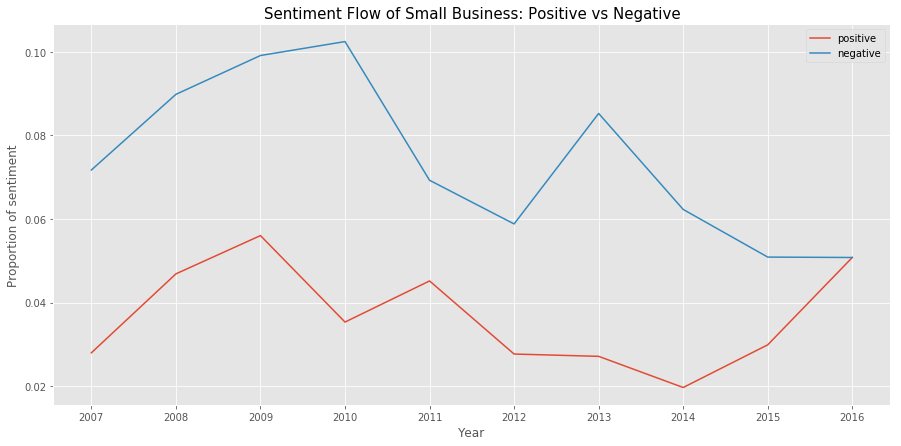

In [31]:
plt.figure(figsize=(15,7))
plt.plot(sentiment_proportion.sort_values("year").positive, label="positive");
plt.plot(sentiment_proportion.sort_values("year").negative, label="negative");
plt.xticks(range(len(sentiment_proportion.sort_values("year").year)),sentiment_proportion.sort_values("year").year);
plt.title("Sentiment Flow of Small Business: Positive vs Negative", fontsize=15);
plt.xlabel("Year", fontsize=12);
plt.ylabel("Proportion of sentiment", fontsize=12);
plt.legend();
plt.savefig("sentiment_proportion")